In [2]:
import pandas as pd
import numpy as np
# k-Means Model
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Warning 생략
import warnings
warnings.filterwarnings('ignore')

# 'hair growth', 'Skin darkening', 'Weight gain'

In [39]:
df = pd.read_csv("../Data/pcos_sameYN.csv")
df

,PCOS,Age,Weight,Height,BMI,Blood Type,Pulse rate,Cycle length,Marraige Status,Pregnant,...,Waist:Hip Ratio,Weight gain,hair growth,Skin darkening,Hair loss,Pimples,Fast food,Reg.Exercise,BP_Systolic,BP_Diastolic
0,0.0,28.0,60.0,160.000,23.437500,15.0,72.0,7.0,3.0,0.0,...,0.842105,1.0,1.0,1.0,1.0,1.0,0.0,0.0,120.0,80.0
1,0.0,28.0,80.0,163.000,30.110279,15.0,74.0,6.0,6.0,1.0,...,0.900000,1.0,1.0,1.0,1.0,1.0,1.0,0.0,120.0,80.0
2,0.0,30.0,55.1,167.640,19.606329,11.0,72.0,5.0,8.5,0.0,...,0.941176,1.0,1.0,1.0,1.0,1.0,1.0,0.0,110.0,80.0
3,0.0,26.0,54.0,150.000,24.000000,11.0,72.0,3.0,5.0,0.0,...,0.944444,1.0,1.0,1.0,1.0,0.0,1.0,0.0,120.0,70.0
4,0.0,27.0,65.0,162.000,24.767566,15.0,72.0,5.0,3.5,0.0,...,0.947368,1.0,1.0,1.0,1.0,1.0,0.0,0.0,110.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,1.0,27.0,50.0,168.000,17.700000,13.0,72.0,2.0,7.0,0.0,...,0.961538,0.0,1.0,0.0,0.0,1.0,0.0,0.0,120.0,70.0
350,1.0,36.0,60.0,150.000,26.700000,15.0,72.0,7.0,8.0,0.0,...,0.952381,1.0,0.0,0.0,0.0,1.0,0.0,0.0,110.0,80.0
351,1.0,27.0,70.0,170.688,24.000000,13.0,72.0,5.0,4.0,1.0,...,0.954545,1.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,80.0
352,1.0,26.0,53.5,161.544,20.500000,14.0,70.0,7.0,3.0,0.0,...,0.928571,0.0,0.0,0.0,0.0,1.0,0.0,0.0,110.0,80.0


### clustering

In [40]:
df.columns

Index(['PCOS', 'Age', 'Weight', 'Height', 'BMI', 'Blood Type', 'Pulse rate',
       'Cycle length', 'Marraige Status', 'Pregnant', 'aborptions', 'Hip',
       'Waist', 'Waist:Hip Ratio', 'Weight gain', 'hair growth',
       'Skin darkening', 'Hair loss', 'Pimples', 'Fast food', 'Reg.Exercise',
       'BP_Systolic', 'BP_Diastolic'],
      dtype='object')

In [86]:
df_target = df.PCOS
df_features = df[['Age','BMI','hair growth', 'Skin darkening', 'Weight gain', 'Hair loss']]

In [87]:
df_features

,Age,BMI,hair growth,Skin darkening,Weight gain,Hair loss
0,28.0,23.437500,1.0,1.0,1.0,1.0
1,28.0,30.110279,1.0,1.0,1.0,1.0
2,30.0,19.606329,1.0,1.0,1.0,1.0
3,26.0,24.000000,1.0,1.0,1.0,1.0
4,27.0,24.767566,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...
349,27.0,17.700000,1.0,0.0,0.0,0.0
350,36.0,26.700000,0.0,0.0,1.0,0.0
351,27.0,24.000000,0.0,0.0,1.0,0.0
352,26.0,20.500000,0.0,0.0,0.0,0.0


In [88]:
# # 데이터 표준화
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# df_scaled = pd.DataFrame(scaler.fit_transform(df_features), columns=['hair growth', 'Skin darkening', 'Weight gain','Fast food', 'Pimples'])

In [89]:
# df_scaled

In [90]:
# feature data에서 유사한 특성을 가진 데이터를 3개의 클러스터로 그룹화
km = KMeans(n_clusters=3, random_state=42)
km.fit(df_features)
# 유사한 3개의 클러스터 그룹을 예측 했을 때 나오는 숫자 배열
predict = pd.DataFrame(km.predict(df_features))
predict.columns = ['predict']

In [91]:
# clustering으로 만든 각 데이터의 숫자 배열
km.labels_

array([1, 0, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 0, 1, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 1, 0, 0, 0, 1, 2, 1, 1, 1, 2, 1,
       1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 2, 1, 1, 2, 2, 0, 1, 2, 1, 2, 2, 0, 1, 2, 1, 2, 2, 2, 0, 0,
       2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 1, 1, 2, 2,
       1, 2, 0, 0, 2, 0, 1, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 2, 1, 2, 1, 0, 0, 2, 0, 0, 1, 0, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0,
       2, 2, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 0, 2, 2, 2, 1, 1, 1, 1, 2, 0,
       2, 2, 1, 0, 1, 0, 1, 2, 0, 2, 2, 1, 0, 1, 2, 2, 2, 1, 0, 2, 0, 0,
       0, 1, 0, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,

In [92]:
# 해당 데이터에 clustering 된 숫자 배열을 붙임(각 데이터 특성에 맞는 숫자(predict) 컬럼이 한 줄 붙는다.)
r = pd.concat([df_features,predict], axis=1)

In [93]:
# feature columns와 predict 합친 데이터프레임
r

,Age,BMI,hair growth,Skin darkening,Weight gain,Hair loss,predict
0,28.0,23.437500,1.0,1.0,1.0,1.0,1
1,28.0,30.110279,1.0,1.0,1.0,1.0,0
2,30.0,19.606329,1.0,1.0,1.0,1.0,1
3,26.0,24.000000,1.0,1.0,1.0,1.0,1
4,27.0,24.767566,1.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...
349,27.0,17.700000,1.0,0.0,0.0,0.0,1
350,36.0,26.700000,0.0,0.0,1.0,0.0,2
351,27.0,24.000000,0.0,0.0,1.0,0.0,1
352,26.0,20.500000,0.0,0.0,0.0,0.0,1


In [94]:
# plt.scatter(r['hair growth'],r['Skin darkening'],r['Weight gain'],c=r['predict'], alpha=0.5)

In [95]:
# centers = pd.DataFrame(km.cluster_centers_,columns=['hair growth', 'Skin darkening', 'Weight gain'])
# center_x = centers['hair growth']
# center_y = centers['Skin darkening']
# center_z = centers['Weight gain']
# plt.scatter(center_x, center_y, center_z, marker='D', c='r')
# plt.show()

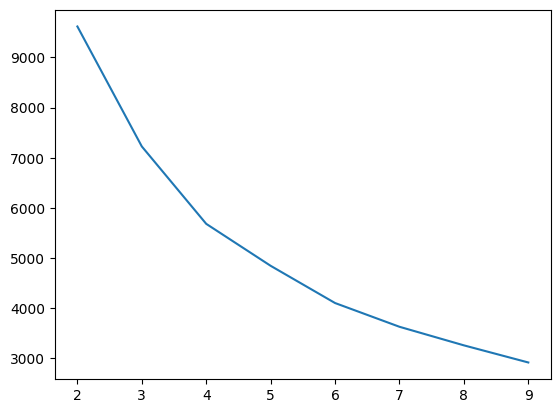

In [96]:
scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_features)
    scores.append(km.inertia_)

plt.plot(range(2,10), scores)
plt.show()

> 처음 꺽이는 부분 : 3      
> 차이가 없는 구간 8-9

Elbow Method : Cluster간의 거리의 합을 나타내는 inertia(관성)가 급격히 떨어지는 구간이 생기는데     
이 지점의 k값을 군집의 개수로 사용.

## PCA 수행

In [97]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca = pca.fit(df_features)
pca_1 = pca.transform(df_features)

In [98]:
# PCA를 수행한 결과(pca_1)와 클래스 레이블 정보를 포함한 데이터셋을 합쳐서 pca_df라는 변수에 저장합니다.
pca_df = pd.DataFrame({'pca_1': pca_1[:, 0], 'PCOS': df_target})

In [99]:
# pca로 1개로 만든 새로운 feature column과 PCOS값 label
pca_df

,pca_1,PCOS
0,-3.334446,0.0
1,-2.335625,0.0
2,-1.930620,0.0
3,-5.227545,0.0
4,-4.124002,0.0
...,...,...
349,-5.169697,1.0
350,5.083970,1.0
351,-4.218022,1.0
352,-5.733375,1.0


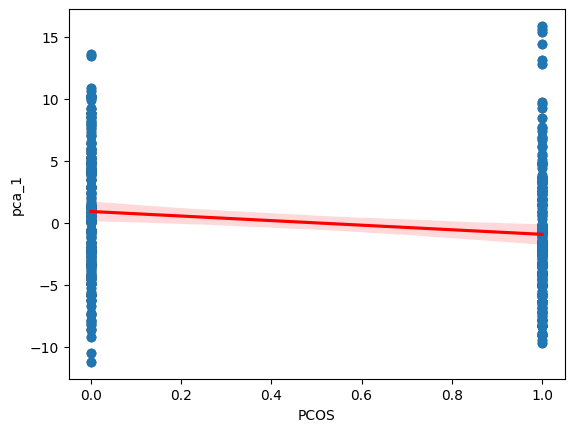

In [100]:
import seaborn as sns
# PCA를 수행한 데이터 프레임에서 1개의 feature column만 선택합니다.
new_df = pca_df[['pca_1']]

# 해당 feature column에 대응하는 데이터 포인트의 값(예: 클래스 레이블)을 y값으로 설정합니다.
y = pca_df['PCOS']

# 1차원 선 그래프를 그립니다.


plt.plot(y, new_df, 'o')
sns.regplot(
    y = new_df,
    x = pca_df['PCOS'],
    data=pca_df,
    scatter_kws={'color' : 'black'},    # scatter color
    line_kws={'color' : 'red'},     #regression line color, 선 주변 퍼져있는 구간(표준 오차)
    fit_reg=True
)

plt.show()